### Import libraries and load data

In [2]:
%matplotlib inline

# Import Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing Statsmodels
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from scipy.stats import chisquare

#Scikitlearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from yellowbrick.regressor import ResidualsPlot, PredictionError, AlphaSelection

In [3]:
df = pd.read_csv('home_train_test.csv')
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Solar [kW],503909.0,0.076229,0.128427,0.000000,0.003367,0.004283,0.083917,0.613883
temperature [C],503909.0,10.412179,10.618791,-24.800000,2.094444,10.177778,19.033333,34.288889
humidity,503909.0,0.664085,0.194389,0.130000,0.510000,0.680000,0.840000,0.980000
visibility,503909.0,9.253443,1.611188,0.270000,9.420000,10.000000,10.000000,10.000000
pressure,503909.0,1016.301637,7.895188,986.400000,1011.290000,1016.530000,1021.480000,1042.460000
windSpeed,503909.0,6.649928,3.982716,0.000000,3.660000,5.930000,8.940000,22.910000
windBearing,503909.0,202.356533,106.520351,0.000000,148.000000,208.000000,295.000000,359.000000
precipIntensity,503909.0,0.002598,0.011257,0.000000,0.000000,0.000000,0.000000,0.191000
dewPoint,503909.0,38.693993,19.087953,-27.240000,24.600000,39.030000,54.790000,75.490000
precipProbability,503909.0,0.056453,0.165836,0.000000,0.000000,0.000000,0.000000,0.840000


Set X and y

In [4]:
X = df.drop(['Gen [kw]'], axis=1)
y = df['Gen [kw]']

Feature Scaling

In [5]:
sc = StandardScaler()
X = sc.fit_transform(X)

C:\Users\My Computer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\My Computer\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Fitting Model

Create training and testing vars

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)
print ('X training set:', X_train.shape,'Y training set:', y_train.shape)
print ('X testing set:', X_test.shape, 'Y testing set:', y_test.shape)

X training set: (403127, 39) Y training set: (403127,)
X testing set: (100782, 39) Y testing set: (100782,)


In [7]:
# Using Lasso regression model with alpha = 0.0001
model= Lasso(alpha=0.0001)
# Train Lasso Regression model
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

Returns the coefficient of determination R^2 of the prediction.

In [55]:
print(model.score(X_train,y_train),model.score(X_test,y_test))

0.9999983157964681 0.9999983125897508


R^2 score of training and testing data sets:

In [56]:
print('Training r2_score: ', r2_score(y_train, y_train_pred))
print('Testing r2_score: ', r2_score(y_test, y_pred))

Training r2_score:  0.9999983157964681
Testing r2_score:  0.9999983125897508


MAE, MSE, RMSE score of training data set:

In [57]:
print('Mean Absolute Error:', mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error:', mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error: 0.00014162190970231817
Mean Squared Error: 3.0988459540998074e-08
Root Mean Squared Error: 0.0001760353928646114


MAE, MSE, RMSE score of testing data sets:

In [8]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0001415384969269088
Mean Squared Error: 3.1076732418878473e-08
Root Mean Squared Error: 0.00017628593936805758


### Error Visualisation

In [60]:
df1 = pd.DataFrame({'y_train_pred': y_train_pred, 'y_train': y_train}, columns=['y_train_pred', 'y_train'])
df1['residual']= df1['y_train_pred'] - df1['y_train']
df2 = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test}, columns=['y_pred', 'y_test'])
df2['residual']= df2['y_pred'] - df2['y_test']

Residual Histogram

Training Data

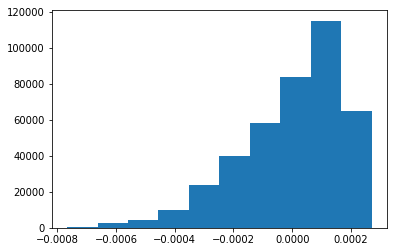

In [45]:
plt.hist(df1['residual'])
plt.show()

Testing Data

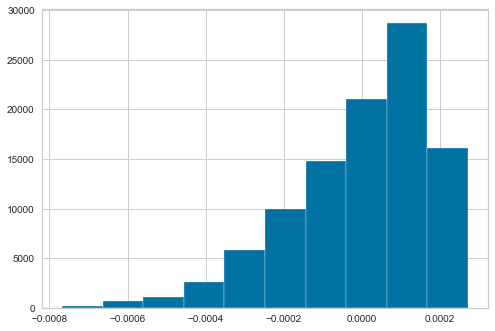

In [63]:
plt.hist(df2['residual'])
plt.show()

Residual Scatter Plot

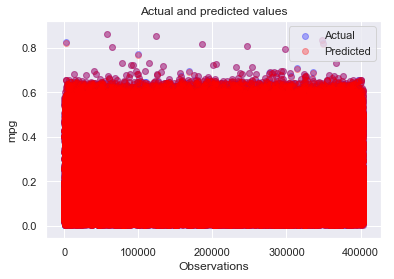

In [47]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_train.size), y=y_train, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_train_pred.size), y=y_train_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

Yellowbrick Package Visualisation

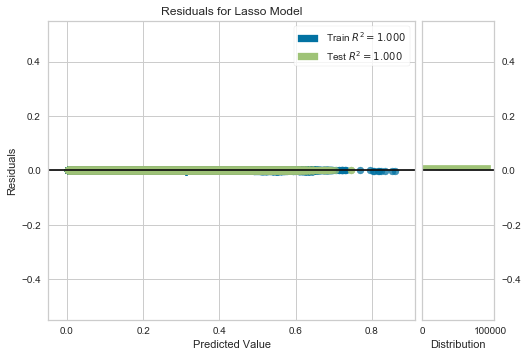

In [51]:
# Residual plot, check Rquare
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_pred)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

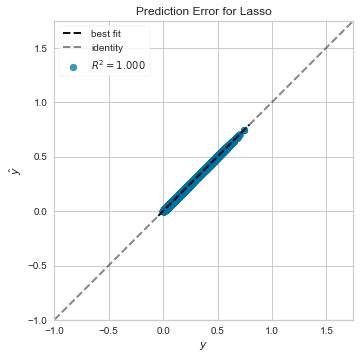

In [52]:
visualizer1 = PredictionError(model)

visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_pred)  # Evaluate the model on the test data
g = visualizer1.poof()             # Draw/show/poof the data

### Stats Model Evaluation

In [69]:
# Note the difference in argument order
model2 = sm.OLS(y_train, X_train).fit()
# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Gen [kw]   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     9384.
Date:                Mon, 11 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:52:25   Log-Likelihood:             1.5778e+05
No. Observations:              403127   AIC:                        -3.155e+05
Df Residuals:                  403098   BIC:                        -3.152e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1276      0.000    488.908      0.000       0.127       0.128
x2            -0.0031      0.003     -1.044      0.296      -0.009       0.003
x3            -0.0032      0.002     -2.023      0.043      -0.006   -9.86e-05
x4            -0.0009      0.000     -2.048      0.041      -0.002   -3.71e-05
x5            -0.0042      0.000    -12.883      0.000      -0.005      -0.004
x6          1.444e+12   3.44e+10     42.041      0.000    1.38e+12    1.51e+12
x7             0.0006      0.000      2.206      0.027    6.92e-05       0.001
x8            -0.0077      0.001     -9.291      0.000      -0.009      -0.006
x9             0.0014      0.003      0.433      0.665      -0.005       0.008
x10            0.0207      0.002     11.889      0.000       0.017       0.024
x11        -1.444e+12   3.44e+10    -42.041      0.000   -1.51e+12   -1.38e+12
x12         1.065e+12    4.4e+10     24.199      0.000    9.78e+11    1.15e+12
x13        -1.561e+11   1.06e+10    -14.733      0.000   -1.77e+11   -1.35e+11
x14        -1.582e+11   1.07e+10    -14.733      0.000   -1.79e+11   -1.37e+11
x15         1.121e+12   5.45e+10     20.571      0.000    1.01e+12    1.23e+12
x16        -2.385e+11   4.65e+10     -5.135      0.000    -3.3e+11   -1.47e+11
x17         5.249e+11   3.63e+10     14.466      0.000    4.54e+11    5.96e+11
x18         4.423e+11   3.06e+10     14.466      0.000    3.82e+11    5.02e+11
x19         7.659e+10   2.26e+10      3.385      0.001    3.22e+10    1.21e+11
x20         -9.18e+10   4.61e+10     -1.991      0.046   -1.82e+11   -1.45e+09
x21         4.139e+11   4.05e+10     10.209      0.000    3.34e+11    4.93e+11
x22        -6.489e+10   3.03e+10     -2.144      0.032   -1.24e+11   -5.58e+09
x23        -1.253e+10   5.84e+09     -2.144      0.032    -2.4e+10   -1.08e+09
x24        -5.302e+10   2.47e+10     -2.144      0.032   -1.01e+11   -4.56e+09
x25         2.115e+12   6.04e+10     35.029      0.000       2e+12    2.23e+12
x26         6.569e+10   3.14e+10      2.095      0.036    4.23e+09    1.27e+11
x27         5.224e+10   1.49e+09     35.029      0.000    4.93e+10    5.52e+10
x28         3.152e+11   2.39e+10     13.184      0.000    2.68e+11    3.62e+11
x29         8.006e+10   6.07e+09     13.184      0.000    6.82e+10     9.2e+10
x30         4.381e+11   4.73e+10      9.262      0.000    3.45e+11    5.31e+11
x31         9.762e+10    7.4e+09     13.184      0.000    8.31e+10    1.12e+11
x32         1.049e+11   5.01e+10      2.095      0.036    6.76e+09    2.03e+11
x33         4.888e+11   3.71e+10     13.184      0.000    4.16e+11    5.61e+11
x34         2.451e+11   1.39e+10     17.660      0.000    2.18e+11    2.72e+11
x35        -6.266e+11   4.24e+10    -14.774      0.000    -7.1e+11   -5.43e+11
x36         8.528e+11   4.83e+10     17.660      0.000    7.58e+11    9.47e+11
x3